In [1]:
import tensorflow
import matplotlib.pyplot as plt

2022-12-10 14:49:22.995420: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Bidirectional, TimeDistributed, Dropout, LayerNormalization
from keras.layers import LSTM
import numpy as np
import keras
from sklearn.preprocessing import LabelEncoder

In [12]:
train_x= np.load('SPD/train_x_15.npy')
train_y = np.load('SPD/train_y_15.npy')
valid_x= np.load('SPD/valid_x_15.npy')
valid_y= np.load('SPD/valid_y_15.npy')

In [13]:
input_shape = train_x.shape[1:]
#input_shape = train_x.shape
print(input_shape)

(137, 35)


In [14]:
print(train_y.shape)

(8960, 137, 1)


In [15]:
def build_model():
    model = Sequential()

    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.3))
    #model.add(SeqSelfAttention(attention_activation='sigmoid'))
    
    
    model.add(Bidirectional(LSTM(256, return_sequences=True)))
    model.add(Dropout(0.3))
    model.add(TimeDistributed(Dense(128)))
    model.add(TimeDistributed(Dense(64)))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))

    model.build(input_shape=(None, 137, 35))
    return model

In [17]:
model=build_model()
model.summary()

2022-12-10 15:02:58.703241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 15:02:58.743553: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 137, 256)         167936    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 137, 256)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 137, 512)         1050624   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 137, 512)          0         
                                                                 
 time_distributed (TimeDistr  (None, 137, 128)         65664     
 ibuted)                                                         
                                                        

In [18]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["binary_accuracy"],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 137, 256)         167936    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 137, 256)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 137, 512)         1050624   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 137, 512)          0         
                                                                 
 time_distributed (TimeDistr  (None, 137, 128)         65664     
 ibuted)                                                         
                                                        

In [19]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

In [20]:
history=model.fit(
    x=train_x,
    y=train_y,
    validation_data=(valid_x, valid_y),
    epochs=1,
    steps_per_epoch=2,
    batch_size=32,
    callbacks=callbacks,
    shuffle=True
)

2/2 [==============================] - 21s 11s/step - loss: 0.7083 - binary_accuracy: 0.4678 - val_loss: 0.6748 - val_binary_accuracy: 0.6253


In [28]:
from tensorflow import keras
from keras.layers import Dense
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


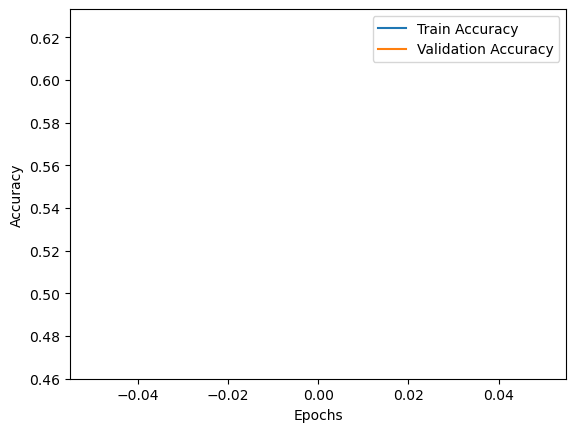

In [22]:
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
!pip install pydot
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 175.0 kB/s eta 0:00:00 0:00:01


In [29]:
!pip install pydot
!pip install graphviz